(content:references:sed_part1)=
# Spectral Energy Distribution (SED) Part 1: *Observing SEDs*

***Author: Marc Hon***

In this chapter, we will learn about the Spectral Energy Distribution (SED) of a star, how they are observed, and what kind of information we can gather from their measurements.



```{figure} images/solarspectrum.jpg
---
height: 600px
width: 750px
name: solarspectrum
---
A high-resolution version of the solar spectrum, shown as a stacked (echelle) spectrum with wavelengths increasing from left to right along each strip, and from bottom to top. Image from NASA, Credit: N.A.Sharp, NOAO/NSO/Kitt Peak FTS/AURA/NSF
```

Incoming light from the stars (like our Sun) are not concentrated at a single wavelength, but are dispersed along a broad range of wavelengths (or colors!). The intensity of light, however, is not uniform across wavelengths.


```{figure} images/solarbb.jpg
---
height: 350px
width: 600px
name: solarbb
---
```

In the case of the Sun, visible light only comprises part of the full electromagnetic spectrum. However, the total radiated energy peaks in the visible. The intensity profile of the radiation with wavelength, or the spectrum as a function of **spectral irradiance** demonstrates this, having a maximum close to a wavelength of 500nm, or 5000 Angstroms.

```{figure} images/solar-radiation.png
---
height: 350px
width: 550px
name: sunwav
---
Spectrum of the Sun compared to a black body spectrum. Image from {cite}`Borfecchia_2013`.

```
This is the **Spectral Energy Distribution (SED)** of the Sun, indicating the energy emitted across wavelengths. Note that the distribution has a characteristic shape -- that is well approximated as a black body.


The Planck blackbody radiation law is:
```{math}
:label: blackbody
\begin{align}
B_\lambda(T) =  \frac{2 h c^2/\lambda^5}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1}
\end{align}
```

where:

- $B_\lambda(T)$ is the spectral radiance in units of (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$ sr$^{-1}$)
- $\lambda$ is the wavelength in units of (Å)
- T is the temperature in units of (K)
- h is Planck’s constant in units of (erg s)
- c is the speed of light in units of (cm s$^{-1}$ )
- $k_B$ is Boltzmann’s constant in units of (erg K$^{-1}$)

```{important}
erg is the cgs (centimeter-gram-second) unit for energy, whereby 1 erg = 1 g cm$^2$ s$^{-2}$.
```

The peak wavelength as well and the power emitted across different wavelengths in a star's spectrum is thus strongly dependent on its surface temperature.

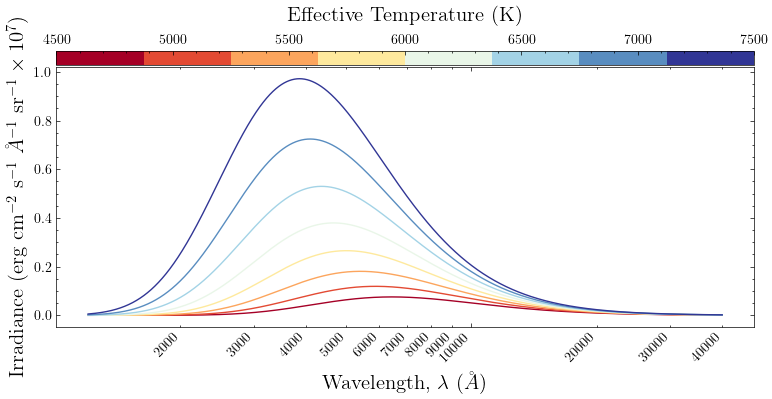

In [195]:
import os
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pysynphot as S

from pathlib import Path
from astropy.io import fits
from matplotlib import cm
from matplotlib.colors import Normalize
from copy import copy
from astropy.modeling.models import BlackBody

data_folder_path = Path.cwd().resolve().parent.parent / 'ml_astro' / 'chapter2' / 'data'
os.environ['PYSYN_CDBS'] = str(data_folder_path)

plt.style.use('science')

fs = 18

temps = np.linspace(4500, 7500, 8)

N = len(temps)
cmap = mpl.colormaps['RdYlBu'].resampled(N)
temp_range = np.linspace(min(temps), max(temps), N)
norm_temp = Normalize(vmin=min(temps), vmax=max(temps))

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)

wav = np.arange(1200, 40000) * u.AA

for i, t in enumerate(temps):
    bb = BlackBody(temperature=t*u.K)
    flux = bb(wav).to(u.erg/u.AA/u.s/u.sr/u.cm/u.cm, equivalencies=u.spectral_density(wav)).value
    ax1.semilogx(wav, flux, color = cmap(i / ((N) - 1)))

sm = cm.ScalarMappable(cmap=cmap, norm=norm_temp)
sm.set_array(N)
cbar = fig.colorbar(sm, ax=ax1, orientation='horizontal', pad=0.005,location='top', aspect=50)
cbar.set_label('Effective Temperature (K)', fontsize=fs-3, labelpad=10)
cbar.ax.xaxis.set_ticks_position('top')  # Move ticks to the top
cbar.ax.xaxis.set_label_position('top')
ax1.set_xlabel('Wavelength, $\\lambda$ ($\\AA$)', fontsize=fs-3)
ax1.set_ylabel('Irradiance (erg cm$^{-2}$ s$^{-1}$ $\\AA^{-1}$ sr$^{-1} \\times 10^7$)', fontsize=fs-3)
ax1.get_xticklabels()

ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.xaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
for label in ax1.get_xminorticklabels():
    label.set_rotation(45)
    label.set_ha('right')

plt.show()


## Photometric colors

Brightness measurements of stars often capture radiation within a range of wavelengths, known as a **passband**. The **throughput** of the passband indicates the sensitivity or response of the filter towards incident flux at a particular wavelength. The following are examples of passbands from the Strömgren photometric system and the Two Micron All-Sky Survey (2MASS).

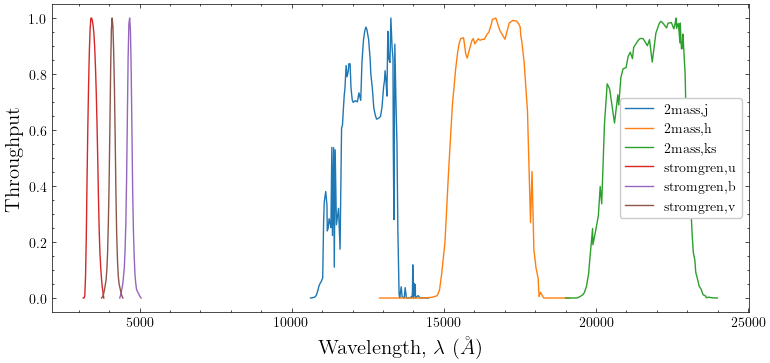

In [196]:
import matplotlib.colors as mcolors

bands = ['2mass,j', '2mass,h', '2mass,ks', 'stromgren,u',  'stromgren,b',  'stromgren,v']

color_list = list(mcolors.TABLEAU_COLORS)  # or CSS4_COLORS, BASE_COLORS
band_colors = {band: color for band, color in zip(bands, color_list)}

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)

for band, color in band_colors.items():
    obs = S.ObsBandpass(band)
    plt.plot(obs.wave, obs.throughput, label=band, c=color)
plt.legend(frameon=True, framealpha=1)
plt.xlabel('Wavelength, $\\lambda$ ($\\AA$)', fontsize=fs-3)
plt.ylabel('Throughput', fontsize=fs-3)
plt.show()

To determine the flux received in a given passband for a given spectrum, we would convolve the spectrum with the passband:

(comp/nonhst/2mass_j_001_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/2mass_h_001_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/2mass_ks_001_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/stromgren_u_005_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/stromgren_b_005_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/stromgren_v_005_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


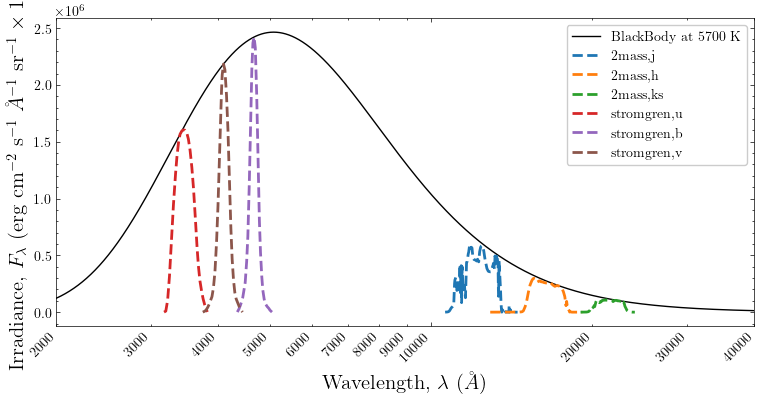

In [197]:
xlim_min, xlim_max = 2000, 40000
wav = np.arange(2000, 40000) * u.AA
temp = 5700
bb = BlackBody(temperature=temp*u.K)
flux = bb(wav).to(u.erg/u.AA/u.s/u.sr/u.cm/u.cm, equivalencies=u.spectral_density(wav)).value
bb_ = S.ArraySpectrum(wav.value, flux)

bands = ['2mass,j', '2mass,h', '2mass,ks', 'stromgren,u',  'stromgren,b',  'stromgren,v']

color_list = list(mcolors.TABLEAU_COLORS)  
band_colors = {band: color for band, color in zip(bands, color_list)}

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)
ax1.semilogx(bb_.wave, bb_.flux, c='k', label=f'BlackBody at {temp} K')

for band, color in band_colors.items():
    obs = S.ObsBandpass(band)
    obs_bb = S.Observation(bb_, obs)

    ax1.semilogx(obs_bb.wave[obs_bb.flux > 0], obs_bb.flux[obs_bb.flux > 0], label=band, c=color, ls='--', lw=2)
    
ax1.set_xlabel('Wavelength, $\\lambda$ ($\\AA$)', fontsize=fs-3)
ax1.set_ylabel('Irradiance, $F_\\lambda$ (erg cm$^{-2}$ s$^{-1}$ $\\AA^{-1}$ sr$^{-1} \\times 10^7$)', fontsize=fs-3)
ax1.set_xlim(xlim_min, xlim_max)
ax1.get_xticklabels()
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.xaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(frameon=1, framealpha=1)
for label in ax1.get_xminorticklabels():
    label.set_rotation(45)
    label.set_ha('right')
plt.show()

When we observe a source through a filter, the detector doesn't see one wavelength, but it sees the spectrum across a range of wavelengths, weighted by the filter throughput. In the above, the dashed lines represents the spectral irradiance convolved with the filter throughput $T(\lambda)$.


But for simplicity, we often represent the total measured flux as if it came from just one wavelength.

To reduce this to an single, measured value, we integrate over the passband, which gives us the mean flux $\langle F_\lambda \rangle$ weighted by the throughput. Formally, we have 

```{math}
:label: integrate_flux
\begin{align}
\langle F_\lambda \rangle = 
\frac{ \int F_\lambda(\lambda) \, T(\lambda) \, \lambda \, d\lambda }{ \int T(\lambda) \, \lambda \, d\lambda }
\end{align}
```

Let's define a function that does this averaging, which gives us **synthetic flux**.

In [209]:
def aggregate_spectrum(observed_wavelengths, observed_flux, 
                  filter_wavelengths, filter_throughput):   

    ## Limiting the observed spectrum to only the range covered by the filter ##

    observed_flux = observed_flux[(observed_wavelengths <= max(filter_wavelengths)) \
                                            & (observed_wavelengths >= min(filter_wavelengths))]
    observed_wavelengths = observed_wavelengths[(observed_wavelengths <= max(filter_wavelengths)) \
                                            & (observed_wavelengths >= min(filter_wavelengths))]

    ## Establishing a common wavelength grid for the observed data and the filter ##
    filter_throughput_interp = np.interp(observed_wavelengths, filter_wavelengths, filter_throughput) # Interpolated Filter Throughput
    
    numerator = np.trapz(observed_flux * filter_throughput_interp * observed_wavelengths, observed_wavelengths)
    denominator = np.trapz(filter_throughput_interp * observed_wavelengths, observed_wavelengths) 
    
    mean_flux = numerator / denominator

    return mean_flux

The above is for flux. But what about an 'average' wavelength? We may define the effective wavelength as the flux-weighted centroid of the wavelength:
```{math}
:label: effective_wavelength
\begin{align}
\langle F_\lambda \rangle = 
\frac{ \int F_\lambda(\lambda) \, T(\lambda) \, \lambda \, d\lambda }{ \int F_\lambda(\lambda) T(\lambda) \, d\lambda }
\end{align}
```
At the same time, we also define the **equivalent width** of the passband, interpreted as the the width of a hypothetical rectangular filter that would pass the same total amount of light as the real filter.

In [215]:
def effective_wavelength(observed_wavelengths, observed_flux, 
                  filter_wavelengths, filter_throughput):   

    ## Limiting the observed spectrum to only the range covered by the filter ##

    observed_flux = observed_flux[(observed_wavelengths <= max(filter_wavelengths)) \
                                            & (observed_wavelengths >= min(filter_wavelengths))]
    observed_wavelengths = observed_wavelengths[(observed_wavelengths <= max(filter_wavelengths)) \
                                            & (observed_wavelengths >= min(filter_wavelengths))]

    ## Establishing a common wavelength grid for the observed data and the filter ##
    filter_throughput_interp = np.interp(observed_wavelengths, filter_wavelengths, filter_throughput) # Interpolated Filter Throughput
    
    numerator = np.trapz(observed_flux * filter_throughput_interp * observed_wavelengths, observed_wavelengths)
    denominator = np.trapz(observed_flux * filter_throughput_interp, observed_wavelengths) 
    
    eff_wav = numerator / denominator

    return eff_wav

def bandpass_width(filter_wavelengths, filter_throughput):
    return np.trapz(filter_throughput/np.max(filter_throughput), filter_wavelengths)

We now have points on the original blackbody spectrum, which are **synthetic photometry** as summary statistics of the flux measured by specific filters for a source. 

```{note}
The effective width of each passband is commonly represented by horizontal errorbars.
```

(comp/nonhst/2mass_j_001_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/2mass_h_001_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/2mass_ks_001_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/stromgren_u_005_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/stromgren_b_005_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(comp/nonhst/stromgren_v_005_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


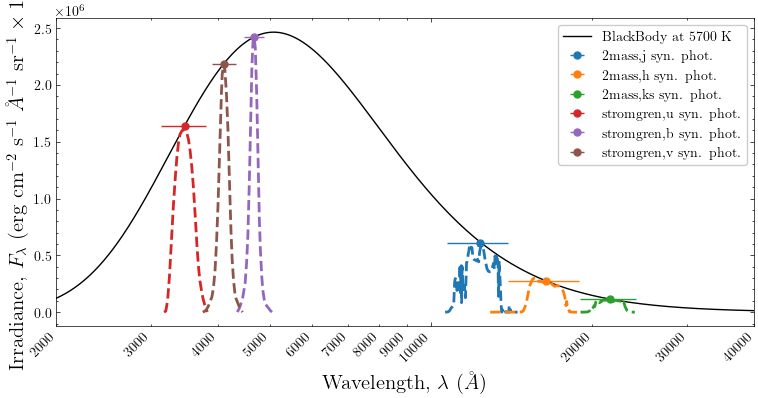

In [234]:
xlim_min, xlim_max = 2000, 40000
wav = np.arange(2000, 40000) * u.AA
temp = 5700
bb = BlackBody(temperature=temp*u.K)
flux = bb(wav).to(u.erg/u.AA/u.s/u.sr/u.cm/u.cm, equivalencies=u.spectral_density(wav)).value
observed_data = S.ArraySpectrum(wav.value, flux)

bands = ['2mass,j', '2mass,h', '2mass,ks', 'stromgren,u',  'stromgren,b',  'stromgren,v']

color_list = list(mcolors.TABLEAU_COLORS)  
band_colors = {band: color for band, color in zip(bands, color_list)}

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)

ax1.plot(observed_data.wave, observed_data.flux, c='k', label=f'BlackBody at {temp} K')

for band, color in band_colors.items():
    bandpass = S.ObsBandpass(band)
    
    synthetic_phot = aggregate_spectrum(observed_data.wave,  ## get synthetic photometry 
                                       observed_data.flux,
                                       bandpass.wave,
                                       bandpass.throughput)
    
    eff_wav = effective_wavelength(observed_data.wave,  ## get effective wavelength 
                                       observed_data.flux,
                                       bandpass.wave,
                                       bandpass.throughput)
    eff_width = bandpass_width(bandpass.wave,
                                       bandpass.throughput)
    
    
    obs_bb = S.Observation(observed_data, bandpass)
    
    obs_wav, obs_flux = obs_bb.wave[obs_bb.flux > 0], obs_bb.flux[obs_bb.flux > 0]

    ax1.plot(obs_wav, obs_flux, c=color, ls='--', lw=2)
    ax1.errorbar(eff_wav, synthetic_phot, xerr=eff_width, ms=5, fmt='o',
                 markerfacecolor=color, ecolor=color, markeredgecolor=color,
                 label=band + ' syn. phot.')
    
ax1.set_xlabel('Wavelength, $\\lambda$ ($\\AA$)', fontsize=fs-3)
ax1.set_ylabel('Irradiance, $F_\\lambda$ (erg cm$^{-2}$ s$^{-1}$ $\\AA^{-1}$ sr$^{-1} \\times 10^7$)', fontsize=fs-3)
ax1.set_xlim(xlim_min, xlim_max)
ax1.get_xticklabels()
ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.xaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(frameon=1, framealpha=1)
for label in ax1.get_xminorticklabels():
    label.set_rotation(45)
    label.set_ha('right')
plt.show()

## Synthetic Photometry and Model Libraries

A blackbody spectrum provides a useful first-order approximation to a star’s spectral energy distribution (SED), capturing its general shape based on temperature alone. 

However, real stellar spectra deviate significantly from ideal blackbodies due to absorption lines, molecular bands, and wavelength-dependent opacity. To accurately model stellar SEDs, we rely on detailed radiative transfer simulations that account for physical processes in stellar atmospheres. These simulations yield libraries of synthetic spectra, such as the Kurucz, or PHOENIX models.

In [258]:
flux_conv = u.erg/u.s/(u.cm*u.cm)/u.AA
flux_conv2 = u.erg/u.s/(u.cm*u.cm)/u.cm
ph_wav_lr = fits.open(str(data_folder_path) + '/model_spectra/lte05700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')

# ph_wav_lr[0].header


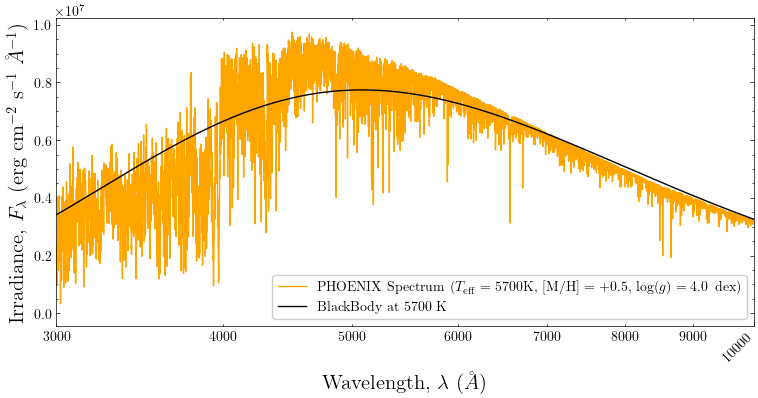

In [259]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)

ax1.plot(ph_wav_lr[0].header['CRVAL1'] + np.arange(ph_wav_lr[0].header['NAXIS1'])*ph_wav_lr[0].header['CDELT1'],
           ph_wav_lr[0].data*flux_conv2.to(flux_conv), color='orange',
        label='PHOENIX Spectrum ($T_{\\mathrm{eff}}=5700$K, [M/H] = +0.0, $\\log(g)=4.0\\,$ dex)')
ax1.plot(observed_data.wave, observed_data.flux*np.pi, c='k', label=f'BlackBody at {temp} K')
ax1.set_xlabel('Wavelength, $\\lambda$ ($\\AA$)', fontsize=fs-3)
ax1.set_ylabel('Irradiance, $F_\\lambda$ (erg cm$^{-2}$ s$^{-1}$ $\\AA^{-1}$)', fontsize=fs-3)
ax1.set_xlim(xlim_min, xlim_max)
ax1.get_xticklabels()
ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.xaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(frameon=1, framealpha=1)
ax1.set_xlim(3000, 10000); plt.show()


These models predict the emergent flux from the stellar surface as a function of effective temperature (T$_\mathrm{eff}$), surface gravity (log g), and metallicity ([M/H]).

```{admonition} Spectral variations
:class: seealso

Qualitatively describe how model spectra change as these three parameters are varied.
```

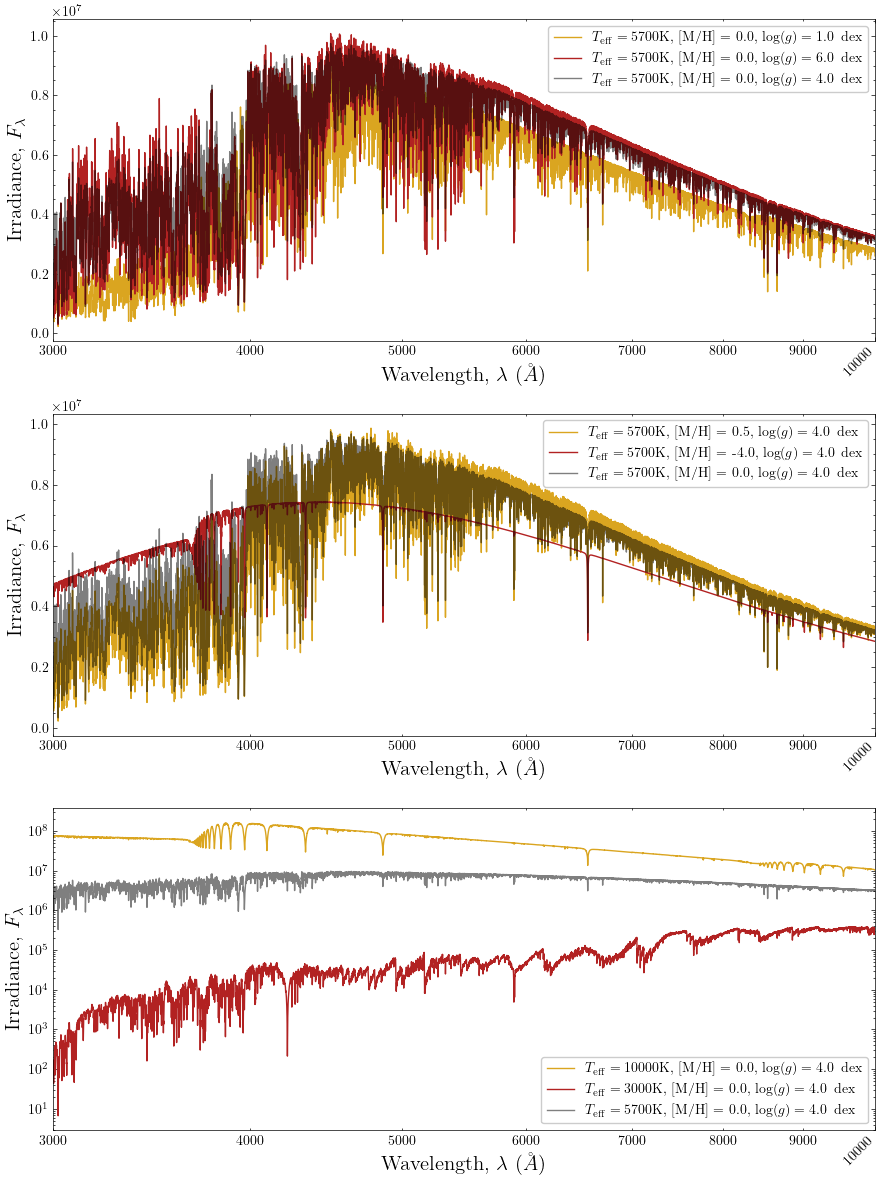

In [304]:
fig = plt.figure(figsize=(9, 12))
ax1, ax2, ax3 = fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)
axlist = [ax1, ax2, ax3]

perm_logg = [(5700, 1.0, 0.0), (5700, 6.0, 0.0)]
perm_met = [(5700, 4.0, 0.5), (5700, 4.0, -4.0)]
perm_teff = [(10000, 4.0, 0.0), (3000, 4.0, 0.0)]

permlist = [perm_logg, perm_met, perm_teff]
folderlist = ['loggvar', 'metvar', 'tempvar']

alt_colors = ['goldenrod', 'firebrick']

for k, perm in enumerate(permlist):
    for i, comb in enumerate(perm):
        str1 = str(comb[1])+'0'
        strmet = '-' + str(abs(comb[2])) if comb[2] <= 0 else '+' + str(comb[2])
        strteff = str(comb[0]).zfill(5)
        f = fits.open(str(data_folder_path) + f'/model_spectra/{folderlist[k]}/lte{strteff}-{str1}{strmet}.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')
        axlist[k].plot(f[0].header['CRVAL1'] + np.arange(f[0].header['NAXIS1'])*f[0].header['CDELT1'],
               f[0].data*flux_conv2.to(flux_conv), color=alt_colors[i],
            label='$T_{\\mathrm{eff}}=%d$K, [M/H] = %.1f, $\\log(g)=%.1f\\,$ dex' %(comb[0], comb[2], comb[1]))    


for i, ax in enumerate(axlist):
    ax.plot(ph_wav_lr[0].header['CRVAL1'] + np.arange(ph_wav_lr[0].header['NAXIS1'])*ph_wav_lr[0].header['CDELT1'],
           ph_wav_lr[0].data*flux_conv2.to(flux_conv), color='k', alpha=0.5,
        label='$T_{\\mathrm{eff}}=5700$K, [M/H] = 0.0, $\\log(g)=4.0\\,$ dex')

    ax.set_xlabel('Wavelength, $\\lambda$ ($\\AA$)', fontsize=fs-3, labelpad=-12)
    ax.set_ylabel('Irradiance, $F_\\lambda$', fontsize=fs-3)
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(frameon=1, framealpha=1)
    ax.set_xlim(3000, 10000)
    if i == 2:
        ax.set_yscale('log')
    
plt.tight_layout(h_pad=1)
plt.show()


We thus create synthetic photometry using these grids of models for stellar characterization.

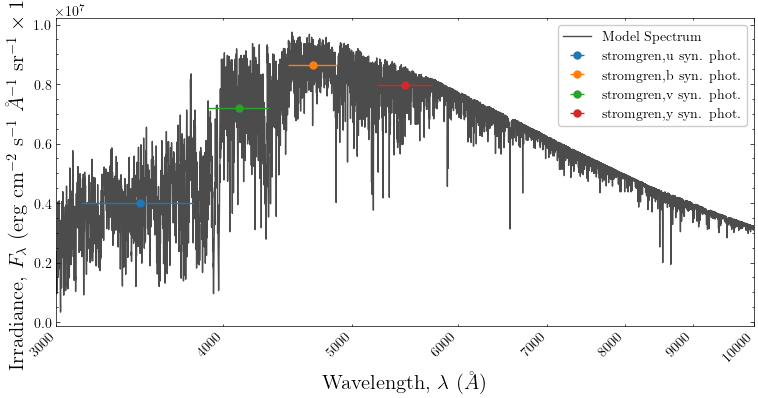

In [324]:
bands = ['stromgren,u',  'stromgren,b',  'stromgren,v', 'stromgren,y']

color_list = list(mcolors.TABLEAU_COLORS)  
band_colors = {band: color for band, color in zip(bands, color_list)}

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)

obs_wav = ph_wav_lr[0].header['CRVAL1'] + np.arange(ph_wav_lr[0].header['NAXIS1'])*ph_wav_lr[0].header['CDELT1']
obs_flux = ph_wav_lr[0].data*flux_conv2.to(flux_conv)

ax1.plot(obs_wav,
           obs_flux, color='k', alpha=0.7,
        label='Model Spectrum')

for band, color in band_colors.items():
    bandpass = S.ObsBandpass(band)
    
    synthetic_phot = aggregate_spectrum(obs_wav,  ## get synthetic photometry 
                                       obs_flux,
                                       bandpass.wave,
                                       bandpass.throughput)
    
    eff_wav = effective_wavelength(obs_wav,  ## get effective wavelength 
                                       obs_flux,
                                       bandpass.wave,
                                       bandpass.throughput)
    eff_width = bandpass_width(bandpass.wave,
                                       bandpass.throughput)
    

    ax1.errorbar(eff_wav, synthetic_phot, xerr=eff_width, ms=5, fmt='o',
                 markerfacecolor=color, ecolor=color, markeredgecolor=color,
                 label=band + ' syn. phot.')
    
ax1.set_xlabel('Wavelength, $\\lambda$ ($\\AA$)', fontsize=fs-3)
ax1.set_ylabel('Irradiance, $F_\\lambda$ (erg cm$^{-2}$ s$^{-1}$ $\\AA^{-1}$ sr$^{-1} \\times 10^7$)', fontsize=fs-3)
ax1.set_xlim(xlim_min, xlim_max)
ax1.get_xticklabels()
ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.xaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(frameon=1, framealpha=1)
ax1.set_xlim(3000, 10000)

for label in ax1.get_xminorticklabels():
    label.set_rotation(45)
    label.set_ha('right')
plt.show()

To characterize the SED of stars, we thus need synthetic photometry across a broad range of filters. But worry not, this compilation has already been done beforehand! The following dataset describes, for each combination of ([M/H], log g, $T_\mathrm{eff}$), the amount of flux received across a particular bandpass, each with its own filter response and effective wavelength. These are summary statistics of an SED, and in the next section, we will use these to determine some properties of the source star.

In [328]:
phot_grid = pd.read_csv(str(data_folder_path) + '/PHOENIX_Hi-Res.csv')
phot_grid.set_index(['met', 'teff', 'logg'])

2MASS_J       2MASS_H       2MASS_Ks     GALEX_NUV  \
met  teff  logg                                                            
-4.0 2300  0.0   1.058111e+05  6.017242e+04   19836.679234  4.444540e-03   
           0.5   1.060151e+05  5.597687e+04   20820.933006  4.048847e-03   
           1.0   1.107346e+05  5.311808e+04   19321.982815  5.235568e-03   
           1.5   1.171880e+05  5.015901e+04   16389.803382  6.946804e-03   
           2.0   1.150667e+05  4.405719e+04   13586.472599  7.883510e-03   
...                       ...           ...            ...           ...   
 1.0 12000 3.5   6.932141e+06  2.430495e+06  890068.594110  2.644481e+08   
           4.0   6.960434e+06  2.433116e+06  894072.566857  2.684006e+08   
           4.5   6.944633e+06  2.422503e+06  893300.509112  2.714133e+08   
           5.0   6.920542e+06  2.411360e+06  891931.702513  2.740514e+08   
           6.0   6.911554e+06  2.408109e+06  892728.934136  2.846844e+08   

                    GALEX_FUV        SDSS_u        SDSS_g        SDSS_r  \
met  teff  logg                                                           
-4.0 2300  0.0   2.708991e-16  1.187580e+01  7.139852e+02  8.055744e+03   
           0.5   1.168651e-14  1.144264e+01  9.062034e+02  1.012105e+04   
           1.0   1.449738e-14  1.445004e+01  1.397745e+03  1.461513e+04   
           1.5   1.577943e-14  2.370615e+01  2.432170e+03  2.313860e+04   
           2.0   2.163268e-13  3.699406e+01  4.034882e+03  3.499772e+04   
...                       ...           ...           ...           ...   
 1.0 12000 3.5   3.094020e+08  1.856007e+08  1.611613e+08  6.867896e+07   
           4.0   3.259429e+08  1.797746e+08  1.612979e+08  6.890590e+07   
           4.5   3.410121e+08  1.732270e+08  1.596438e+08  6.859862e+07   
           5.0   3.533749e+08  1.673190e+08  1.570735e+08  6.813161e+07   
           6.0   3.690017e+08  1.618050e+08  1.516868e+08  6.773093e+07   

                       SDSS_i        SDSS_z  GROUND_JOHNSON_U        Gaia_G  \
met  teff  logg                                                               
-4.0 2300  0.0   2.923520e+04  6.301769e+04      1.462582e+01  2.150200e+04   
           0.5   3.451187e+04  7.054095e+04      1.423996e+01  2.506294e+04   
           1.0   4.646792e+04  8.776270e+04      1.861339e+01  3.311142e+04   
           1.5   6.697513e+04  1.144372e+05      3.108700e+01  4.677585e+04   
           2.0   9.141918e+04  1.402644e+05      4.889519e+01  6.277168e+04   
...                       ...           ...               ...           ...   
 1.0 12000 3.5   3.639615e+07  2.062984e+07      1.972924e+08  7.114838e+07   
           4.0   3.650474e+07  2.049485e+07      1.908012e+08  7.118272e+07   
           4.5   3.637707e+07  2.022250e+07      1.831029e+08  7.057933e+07   
           5.0   3.621229e+07  1.993843e+07      1.756599e+08  6.973279e+07   
           6.0   3.625418e+07  1.962351e+07      1.664466e+08  6.839248e+07   

                      Gaia_BP       Gaia_RP   TYCHO_B_MvB   TYCHO_V_MvB  \
met  teff  logg                                                           
-4.0 2300  0.0   3.550838e+03  3.958364e+04  1.373865e+02  2.374866e+03   
           0.5   4.463470e+03  4.541996e+04  1.594703e+02  3.007574e+03   
           1.0   6.530610e+03  5.867019e+04  2.453806e+02  4.501048e+03   
           1.5   1.055393e+04  8.040522e+04  4.429911e+02  7.506551e+03   
           2.0   1.629285e+04  1.042586e+05  7.605194e+02  1.195571e+04   
...                       ...           ...           ...           ...   
 1.0 12000 3.5   1.216095e+08  3.308739e+07  2.152403e+08  1.129436e+08   
           4.0   1.214956e+08  3.309665e+07  2.126061e+08  1.133762e+08   
           4.5   1.201822e+08  3.287944e+07  2.071153e+08  1.127904e+08   
           5.0   1.183481e+08  3.261943e+07  2.000719e+08  1.117891e+08   
           6.0   1.150726e+08  3.241323e+07  1.853253e+08  1.102632e+08   

                   WISE_RSR_W1   WISE_RSR_W2  
met  t